In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from keras import  Sequential
from keras.layers import Dense


In [46]:
# read data vao DF
data_train = pd.read_csv("/content/gdrive/MyDrive/data/train.csv")
data_test  = pd.read_csv("/content/gdrive/MyDrive/data/test.csv")

In [47]:
data_train


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bdb99f290>],
      dtype=object)

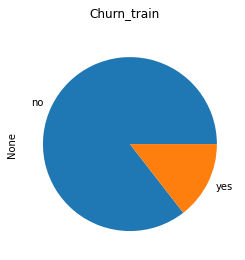

In [48]:
group_df = data_train.groupby('churn').size()
group_df.plot.pie(subplots= True, title= 'Churn_train')


In [49]:
data_train.drop('state', inplace= True, axis= 1)
data_train['international_plan'] = np.where(data_train['international_plan'] == 'yes',1,0)
data_train['voice_mail_plan'] = np.where(data_train['voice_mail_plan'] == 'yes',1,0)
data_train['churn'] = np.where(data_train['churn'] == 'yes',1,0)
data_train['area_code'] = data_train['area_code'].replace("area_code_408", 0)
data_train['area_code'] = data_train['area_code'].replace("area_code_415", 1)
data_train['area_code'] = data_train['area_code'].replace("area_code_510", 2)


In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3333 non-null   int64  
 1   area_code                      3333 non-null   int64  
 2   international_plan             3333 non-null   int64  
 3   voice_mail_plan                3333 non-null   int64  
 4   number_vmail_messages          3333 non-null   int64  
 5   total_day_minutes              3333 non-null   float64
 6   total_day_calls                3333 non-null   int64  
 7   total_day_charge               3333 non-null   float64
 8   total_eve_minutes              3333 non-null   float64
 9   total_eve_calls                3333 non-null   int64  
 10  total_eve_charge               3333 non-null   float64
 11  total_night_minutes            3333 non-null   float64
 12  total_night_calls              3333 non-null   i

In [51]:
data_train.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,1.000600,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.709649,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,1.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,2.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,2.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [52]:
data_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
1663,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
1664,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
1665,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c317c4c50>],
      dtype=object)

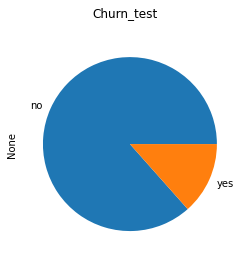

In [53]:
group_df = data_test.groupby('churn').size()
group_df.plot.pie(subplots= True, title= 'Churn_test')


In [54]:
data_test.drop('state', inplace= True, axis= 1)
data_test['international_plan'] = np.where(data_test['international_plan'] == 'yes',1,0)
data_test['voice_mail_plan'] = np.where(data_test['voice_mail_plan'] == 'yes',1,0)
data_test['churn'] = np.where(data_test['churn'] == 'yes',1,0)
data_test['area_code'] = data_test['area_code'].replace("area_code_408", 0)
data_test['area_code'] = data_test['area_code'].replace("area_code_415", 1)
data_test['area_code'] = data_test['area_code'].replace("area_code_510", 2)

In [55]:
x = data_train[['account_length','area_code','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']]
y = data_train['churn']

x = np.array(x)
y = np.array(y)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size= 0.2)

In [56]:
x_test = data_test[['account_length','area_code','international_plan','voice_mail_plan','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']]
y_test = data_test['churn']
x_test = np.array(x_test)
y_test = np.array(y_test)

In [57]:

model = Sequential()
model.add(Dense(512, input_dim = 18, activation = 'relu'))
model.add(Dense(256, activation ='relu'))
model.add(Dense(128, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               9728      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 174,081
Trainable params: 174,081
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
history = model.fit(x_train, y_train, epochs =100, batch_size= 8, validation_data=(x_val, y_val))

Epoch 1/100
334/334 [==============================] - 2s 5ms/step - loss: 0.9833 - accuracy: 0.8087 - val_loss: 0.4751 - val_accuracy: 0.8366
Epoch 2/100
334/334 [==============================] - 1s 4ms/step - loss: 0.4410 - accuracy: 0.8462 - val_loss: 0.3810 - val_accuracy: 0.8741
Epoch 3/100
334/334 [==============================] - 2s 5ms/step - loss: 0.4117 - accuracy: 0.8545 - val_loss: 0.3699 - val_accuracy: 0.8651
Epoch 4/100
334/334 [==============================] - 2s 5ms/step - loss: 0.4256 - accuracy: 0.8492 - val_loss: 0.4142 - val_accuracy: 0.8681
Epoch 5/100
334/334 [==============================] - 2s 5ms/step - loss: 0.4029 - accuracy: 0.8575 - val_loss: 0.4138 - val_accuracy: 0.8651
Epoch 6/100
334/334 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8526 - val_loss: 0.3592 - val_accuracy: 0.8741
Epoch 7/100
334/334 [==============================] - 2s 5ms/step - loss: 0.3900 - accuracy: 0.8552 - val_loss: 0.3665 - val_accuracy: 0.8741

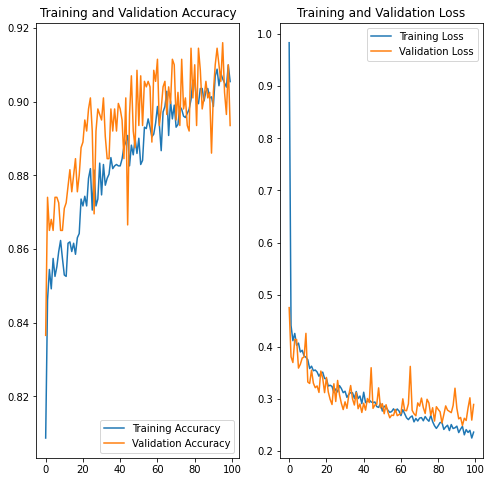

In [61]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 100
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
loss, acc = model.evaluate(x_test, y_test)
print('Loss_test', loss)
print('Accuracy_test', acc)

53/53 [==============================] - 0s 3ms/step - loss: 0.2805 - accuracy: 0.8890
Loss_test 0.28048568964004517
Accuracy_test 0.889022171497345
